In [60]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display
import json
import pickle
from sklearn import metrics

In [61]:
#import user.json as a dict
with open('user.json', "r") as f:
        user=json.load(f)

In [62]:
#tree creation
dtc = tree.DecisionTreeClassifier()

#create label encoder
le1 = LabelEncoder()
le2= LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le5 = LabelEncoder()
le6 = LabelEncoder()



In [63]:
# creating dataframes
for i in range(0, len(user)):
    data = user[str(i)]["data"]
    result = user[str(i)]["result"]
    dataframe = pd.DataFrame(data, columns=["Type 1", "Type 2", "Generation", "color", "legendary"])
    resultframe = pd.DataFrame(result, columns=["favorite"])

    # generating numerical labels
    dataframe["Type 1"] = le1.fit_transform(dataframe["Type 1"])
    dataframe["Type 2"] = le2.fit_transform(dataframe["Type 2"])
    dataframe["color"] = le3.fit_transform(dataframe["color"])
    dataframe["Generation"] = le4.fit_transform(dataframe["Generation"])
    dataframe["legendary"] = le5.fit_transform(dataframe["legendary"])
    resultframe["favorite"] = le6.fit_transform(resultframe["favorite"])
    # Use of decision tree classifiers
    dtc = dtc.fit(dataframe.values, resultframe)

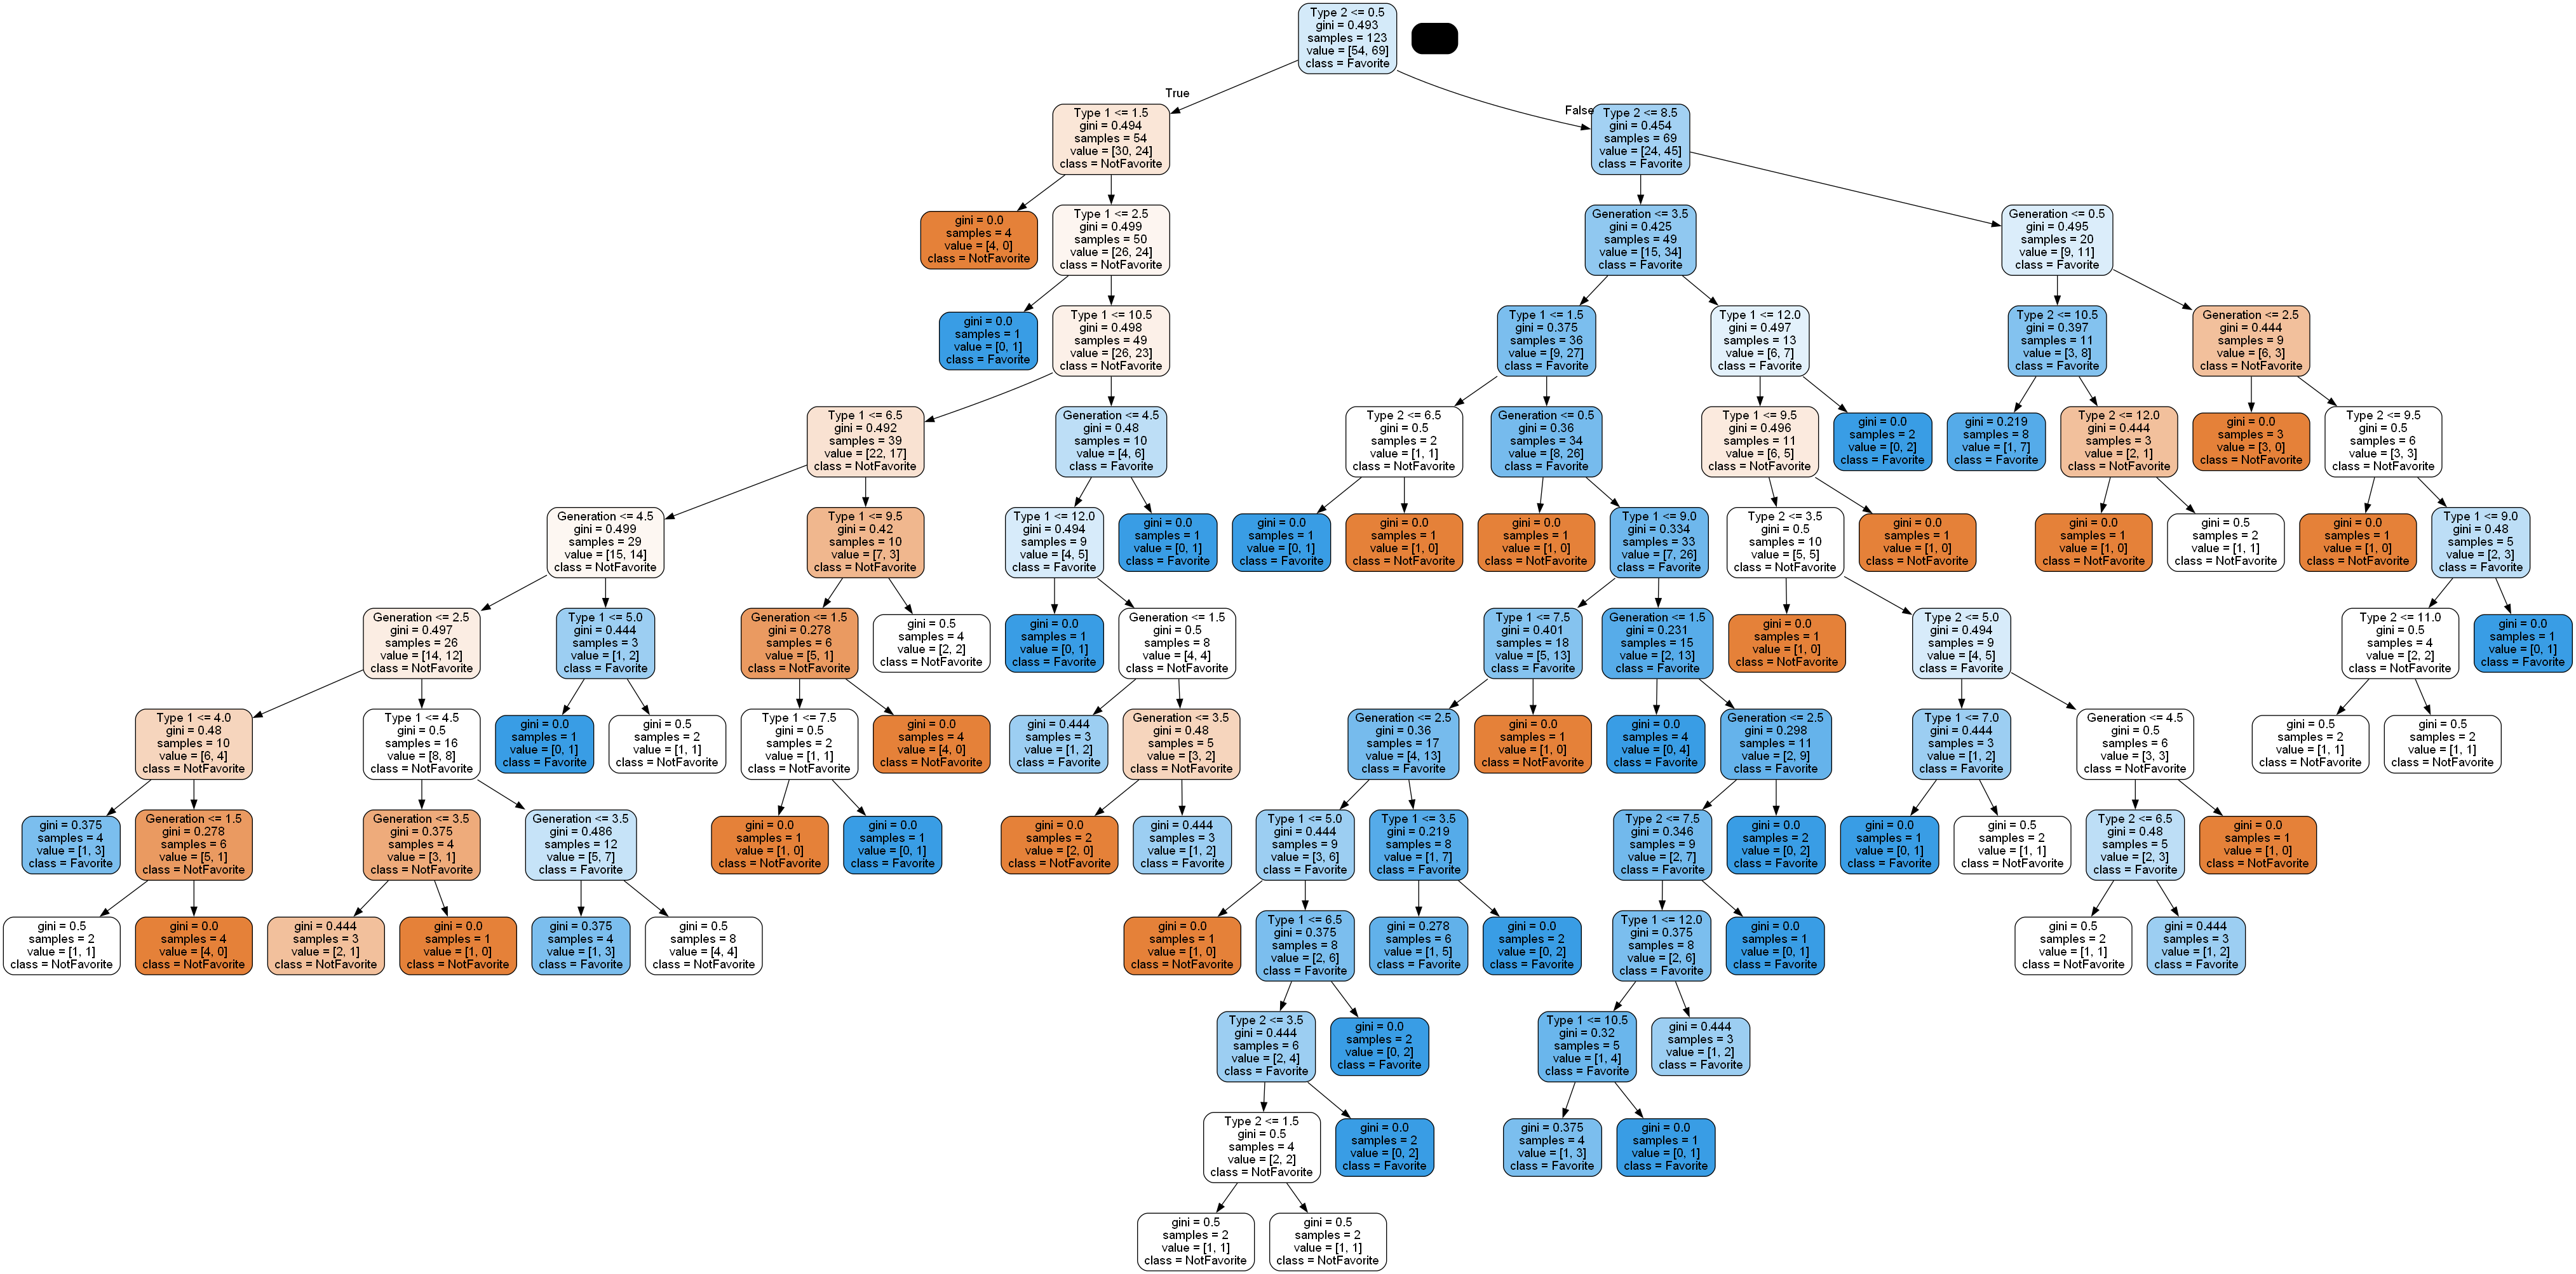

In [64]:
dot_data = tree.export_graphviz(
    dtc,
    out_file=None,
    feature_names=dataframe.columns,
    filled=True,
    rounded=True,
    class_names=le6.inverse_transform(resultframe.favorite.unique()),
)
graph = graphviz.Source(dot_data)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [65]:
# Enregistrement du modèle dans un fichier
with open('model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [66]:
print("Accuracy:",metrics.accuracy_score(resultframe, dtc.predict(dataframe)))

Accuracy: 0.7967479674796748


c:\Users\Tototime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
